In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from itertools import product
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier  
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("selected_features.csv")
data

Have you ever had suicidal thoughts ?  Academic Pressure  \
0                                          1                1.0   
1                                          0                0.4   
2                                          0                0.6   
3                                          1                0.6   
4                                          1                0.8   
...                                      ...                ...   
27893                                      1                1.0   
27894                                      0                0.4   
27895                                      0                0.6   
27896                                      1                1.0   
27897                                      1                0.8   

       Financial Stress  Work/Study Hours  Dietary Habits       Age  \
0                  0.00          0.250000        0.666667  0.588235   
1                  0.25          0.250000        0.333333  0.235294   
2                  0.00          0.750000        0.666667  0.509804   
3                  1.00          0.333333        0.333333  0.392157   
4                  0.00          0.083333        0.333333  0.274510   
...                 ...               ...             ...       ...   
27893              0.00          0.583333        0.000000  0.352941   
27894              0.50          0.000000        0.666667  0.352941   
27895              0.25          1.000000        0.000000  0.509804   
27896              1.00          0.833333        0.666667  0.000000   
27897              0.50          0.166667        0.666667  0.352941   

       Depression  
0             1.0  
1             0.0  
2             0.0  
3             1.0  
4             0.0  
...           ...  
27893         0.0  
27894         0.0  
27895         0.0  
27896         1.0  
27897         1.0  

[27898 rows x 7 columns]

In [4]:
X = data.drop(columns=['Depression'])
y = data['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (22318,)
y_test shape: (5580,)


In [5]:
svc=SVC()
parameters = [ {'C':[1], 'kernel':['linear']},              ]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................C=1, kernel=linear; total time=   2.2s
[CV] END .................................C=1, kernel=linear; total time=   7.3s
[CV] END .................................C=1, kernel=linear; total time=   8.1s
[CV] END .................................C=1, kernel=linear; total time=   7.5s
[CV] END .................................C=1, kernel=linear; total time=   9.5s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1], 'kernel': ['linear']}], scoring='accuracy',
             verbose=2)

In [6]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8422


Parameters that give the best results : 

 {'C': 1, 'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=1, kernel='linear')


In [7]:
# calculate GridSearch CV score on test set

model = grid_search.best_estimator_

print('GridSearch CV score on test set: {0:0.4f}'.format(model.score(X_test, y_test)))

GridSearch CV score on test set: 0.8443


### Check for overfitting and underfitting 

In [9]:

print('Training set score: {:.4f}'.format(grid_search.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(grid_search.score(X_test, y_test)))

Training set score: 0.8420
Test set score: 0.8443


In [10]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# Classification Report
y_pred = model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81      2348
         1.0       0.84      0.90      0.87      3232

    accuracy                           0.84      5580
   macro avg       0.84      0.83      0.84      5580
weighted avg       0.84      0.84      0.84      5580



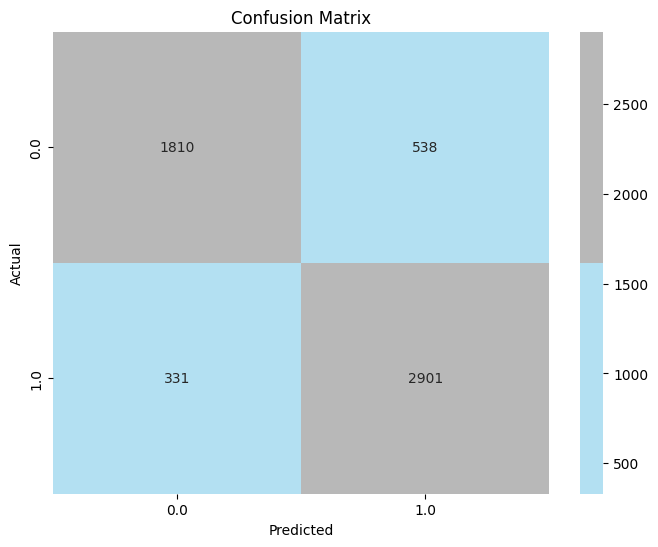

In [11]:
# Confusion Matrix
colorr=[ '#b3e0f2','#b8b8b8']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=colorr, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()